# CUENTA FCBARCELONA

En primer lugar cargamos las librerías

In [1]:
import os
import pandas as pd
from ast import literal_eval
import json
from ast import literal_eval

# import packages
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from matplotlib.pyplot import figure
from datetime import datetime, timedelta

import itertools
import seaborn as sns
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks
np.random.seed(4711)

En primer lugar miraremos el dataframe del fcbarcelona:

In [ ]:
df_fcbarcelona_def=pd.read_excel("df_fcbarcelona_def_sindup1.xlsx")
df_fcbarcelona_def = df_fcbarcelona_def.drop('Unnamed: 0', axis=1)
df_fcbarcelona_def = df_fcbarcelona_def.iloc[:,1:]
df_fcbarcelona_def

,author_followers,music_preciseDuration.preciseDuration,stats_diggCount,stats_shareCount,stats_commentCount,stats_playCount,stats_collectCount,video_duration,video_bitrate,video_volumeInfo.Loudness,video_volumeInfo.Peak,dias_fecactual_fecpublic,hashtagh_deportesentiktok,hashtagh_football,hashtagh_tiktokfootballacademy,tasa_compromiso
0,33136629,19.696314,44200,29,131,435600,1639,19,2301002,-26.2,0.46238,82,True,True,False,0.101837
1,33136707,66.899570,143700,170,310,1000000,7255,66,1636718,-13.0,0.53088,83,True,True,False,0.144180
2,33136972,20.924063,59200,100,201,483100,2579,20,1957611,-23.3,0.37584,83,True,True,False,0.123165
3,33136721,8.803250,61300,107,209,529000,2218,8,2534813,-25.2,0.33113,83,True,True,False,0.116476
4,33136094,8.385250,49600,103,131,510200,2112,8,2342641,-20.9,0.41687,83,False,False,False,0.097675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,33137051,7.732188,1300000,5176,3456,16100000,42447,7,2929667,-14.8,0.91201,233,True,True,False,0.081281
293,33136019,10.161625,175700,876,495,1200000,7676,10,2424470,-19.6,0.55590,234,True,True,True,0.147559
294,33136489,22.648125,158800,1435,532,1300000,6445,22,733253,-9.2,1.00000,234,True,True,True,0.123667
295,33136120,7.862813,250100,894,398,3400000,6556,7,2785052,-15.2,0.93325,235,True,True,True,0.073939


In [ ]:
df_fcbarcelona_cat=df_fcbarcelona_def.iloc[:,12:15]
df_fcbarcelona_cat

,hashtagh_deportesentiktok,hashtagh_football,hashtagh_tiktokfootballacademy
0,True,True,False
1,True,True,False
2,True,True,False
3,True,True,False
4,False,False,False
...,...,...,...
292,True,True,False
293,True,True,True
294,True,True,True
295,True,True,True


Visualizamos un histograma con los datos de nuestro dataframe:

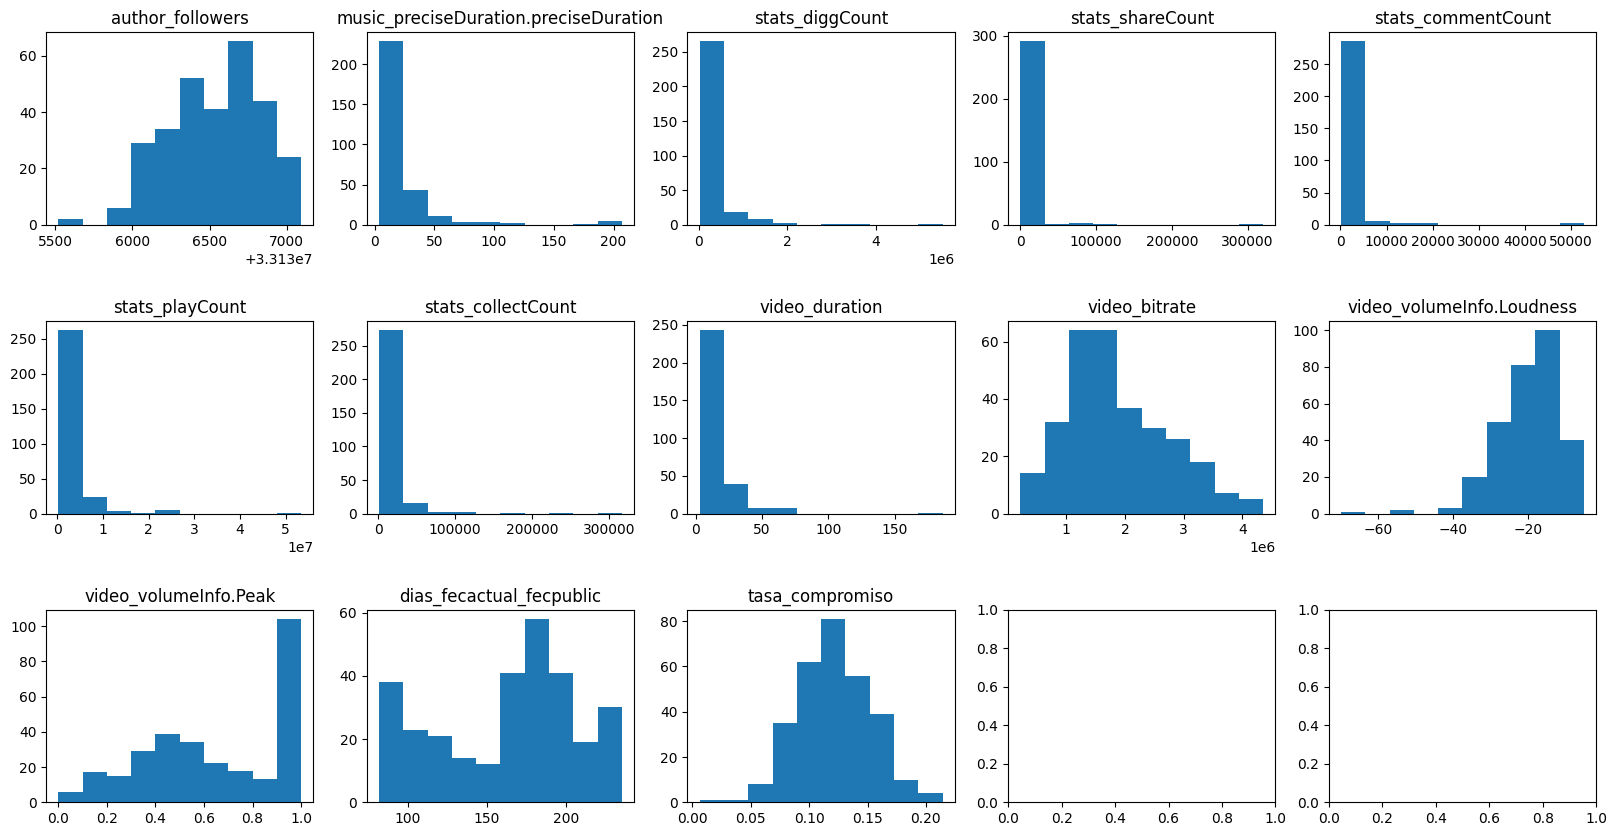

In [ ]:

# Vemos un histograma de las variables continuas del dataframe

def Hist(d):
  fig, axs = plt.subplots(3, 5, figsize=(20, 10))
# Creamos un histograma para cada variable
  axs = axs.ravel()
  for i, col in enumerate(d.columns):
      axs[i].hist(d[col], bins=10)
      axs[i].set_title(col)
# Ajustamos los espacios entre los subplots
  plt.subplots_adjust(wspace=0.2, hspace=0.5)
# Mostramos los histogramas
  plt.show()

df_fcbarcelona_num=df_fcbarcelona_def.iloc[:,:12]

df_fcbarcelona_num=pd.concat([df_fcbarcelona_num, df_fcbarcelona_def['tasa_compromiso']], axis=1)

df_fcbarcelona_num1=df_fcbarcelona_def.iloc[:,:12]

df_fcbarcelona_num1=pd.concat([df_fcbarcelona_num1, df_fcbarcelona_def['tasa_compromiso']], axis=1)

Hist(df_fcbarcelona_num)

Se puede ver a través de un diagrama de bigotes los outliers de cada variable:

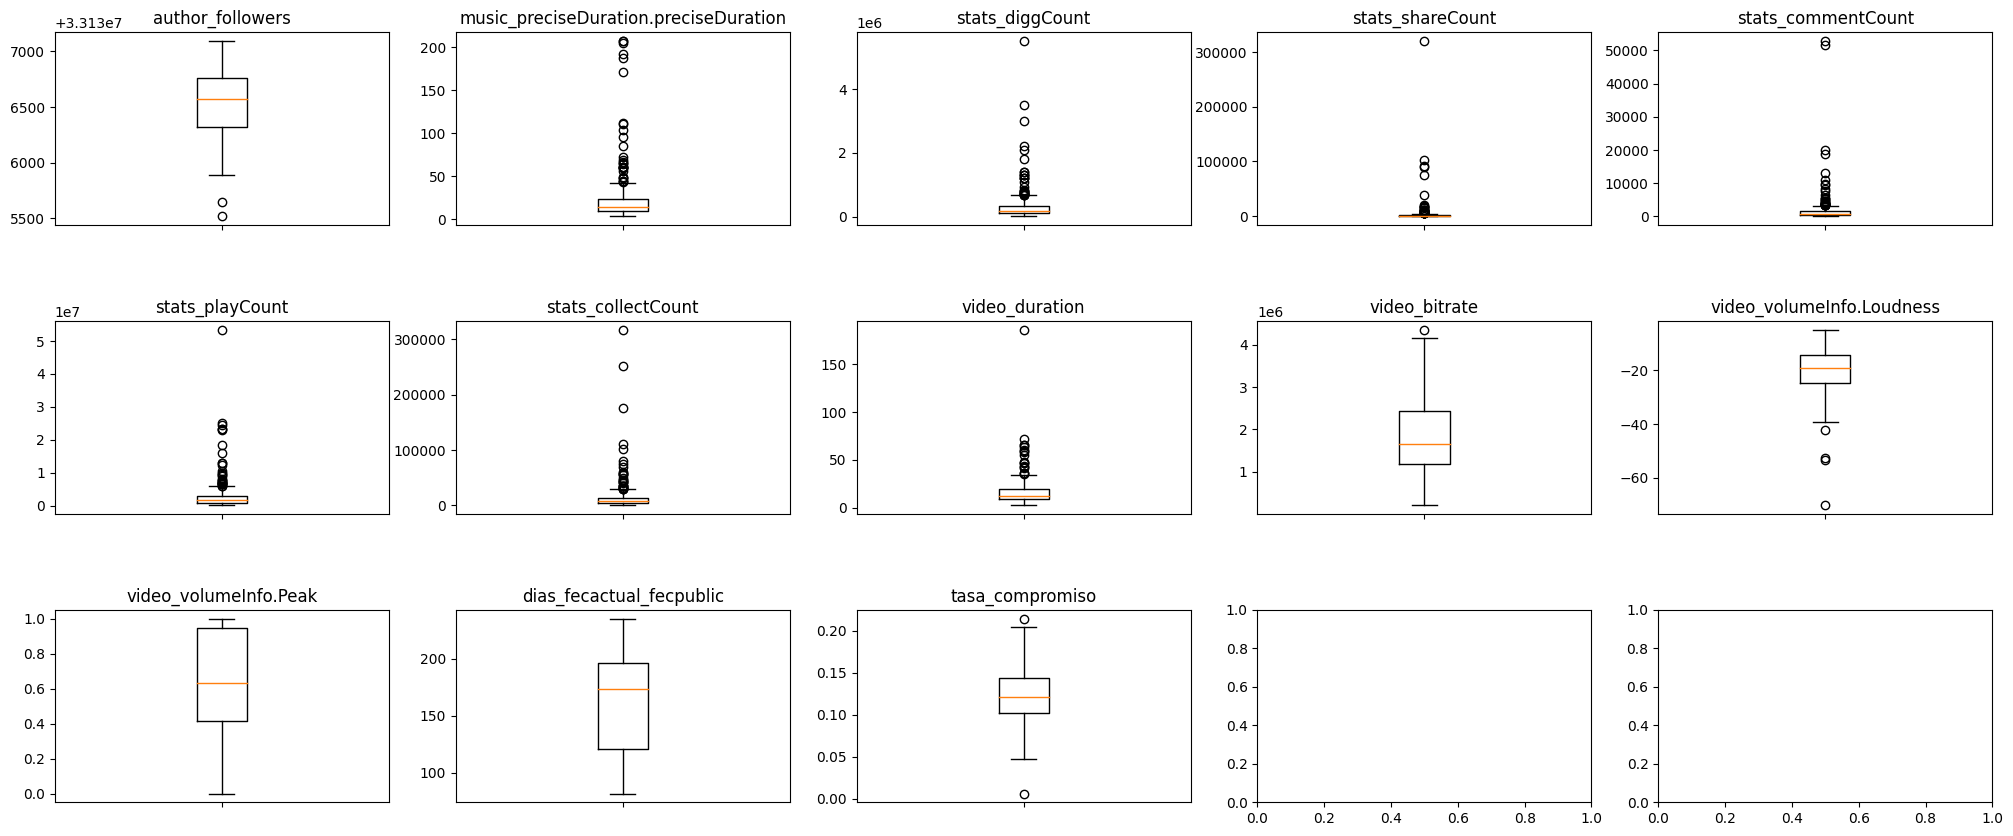

In [ ]:
# Creamos unos diagramas de bigotes

def boxP(d):
  fig, axs = plt.subplots(3, 5, figsize=(25, 10))

# Creamos un boxplot para cada variable
  axs = axs.ravel()
  for i, col in enumerate(d.columns):
      axs[i].boxplot(d[col])
      axs[i].set_title(col)
    #quito los 1
      axs[i].set_xticklabels([])
# Ajustamos los espacios entre los subplots
      plt.subplots_adjust(wspace=0.2, hspace=0.5)

  plt.show()


boxP(df_fcbarcelona_num)

Correlación entre variables:

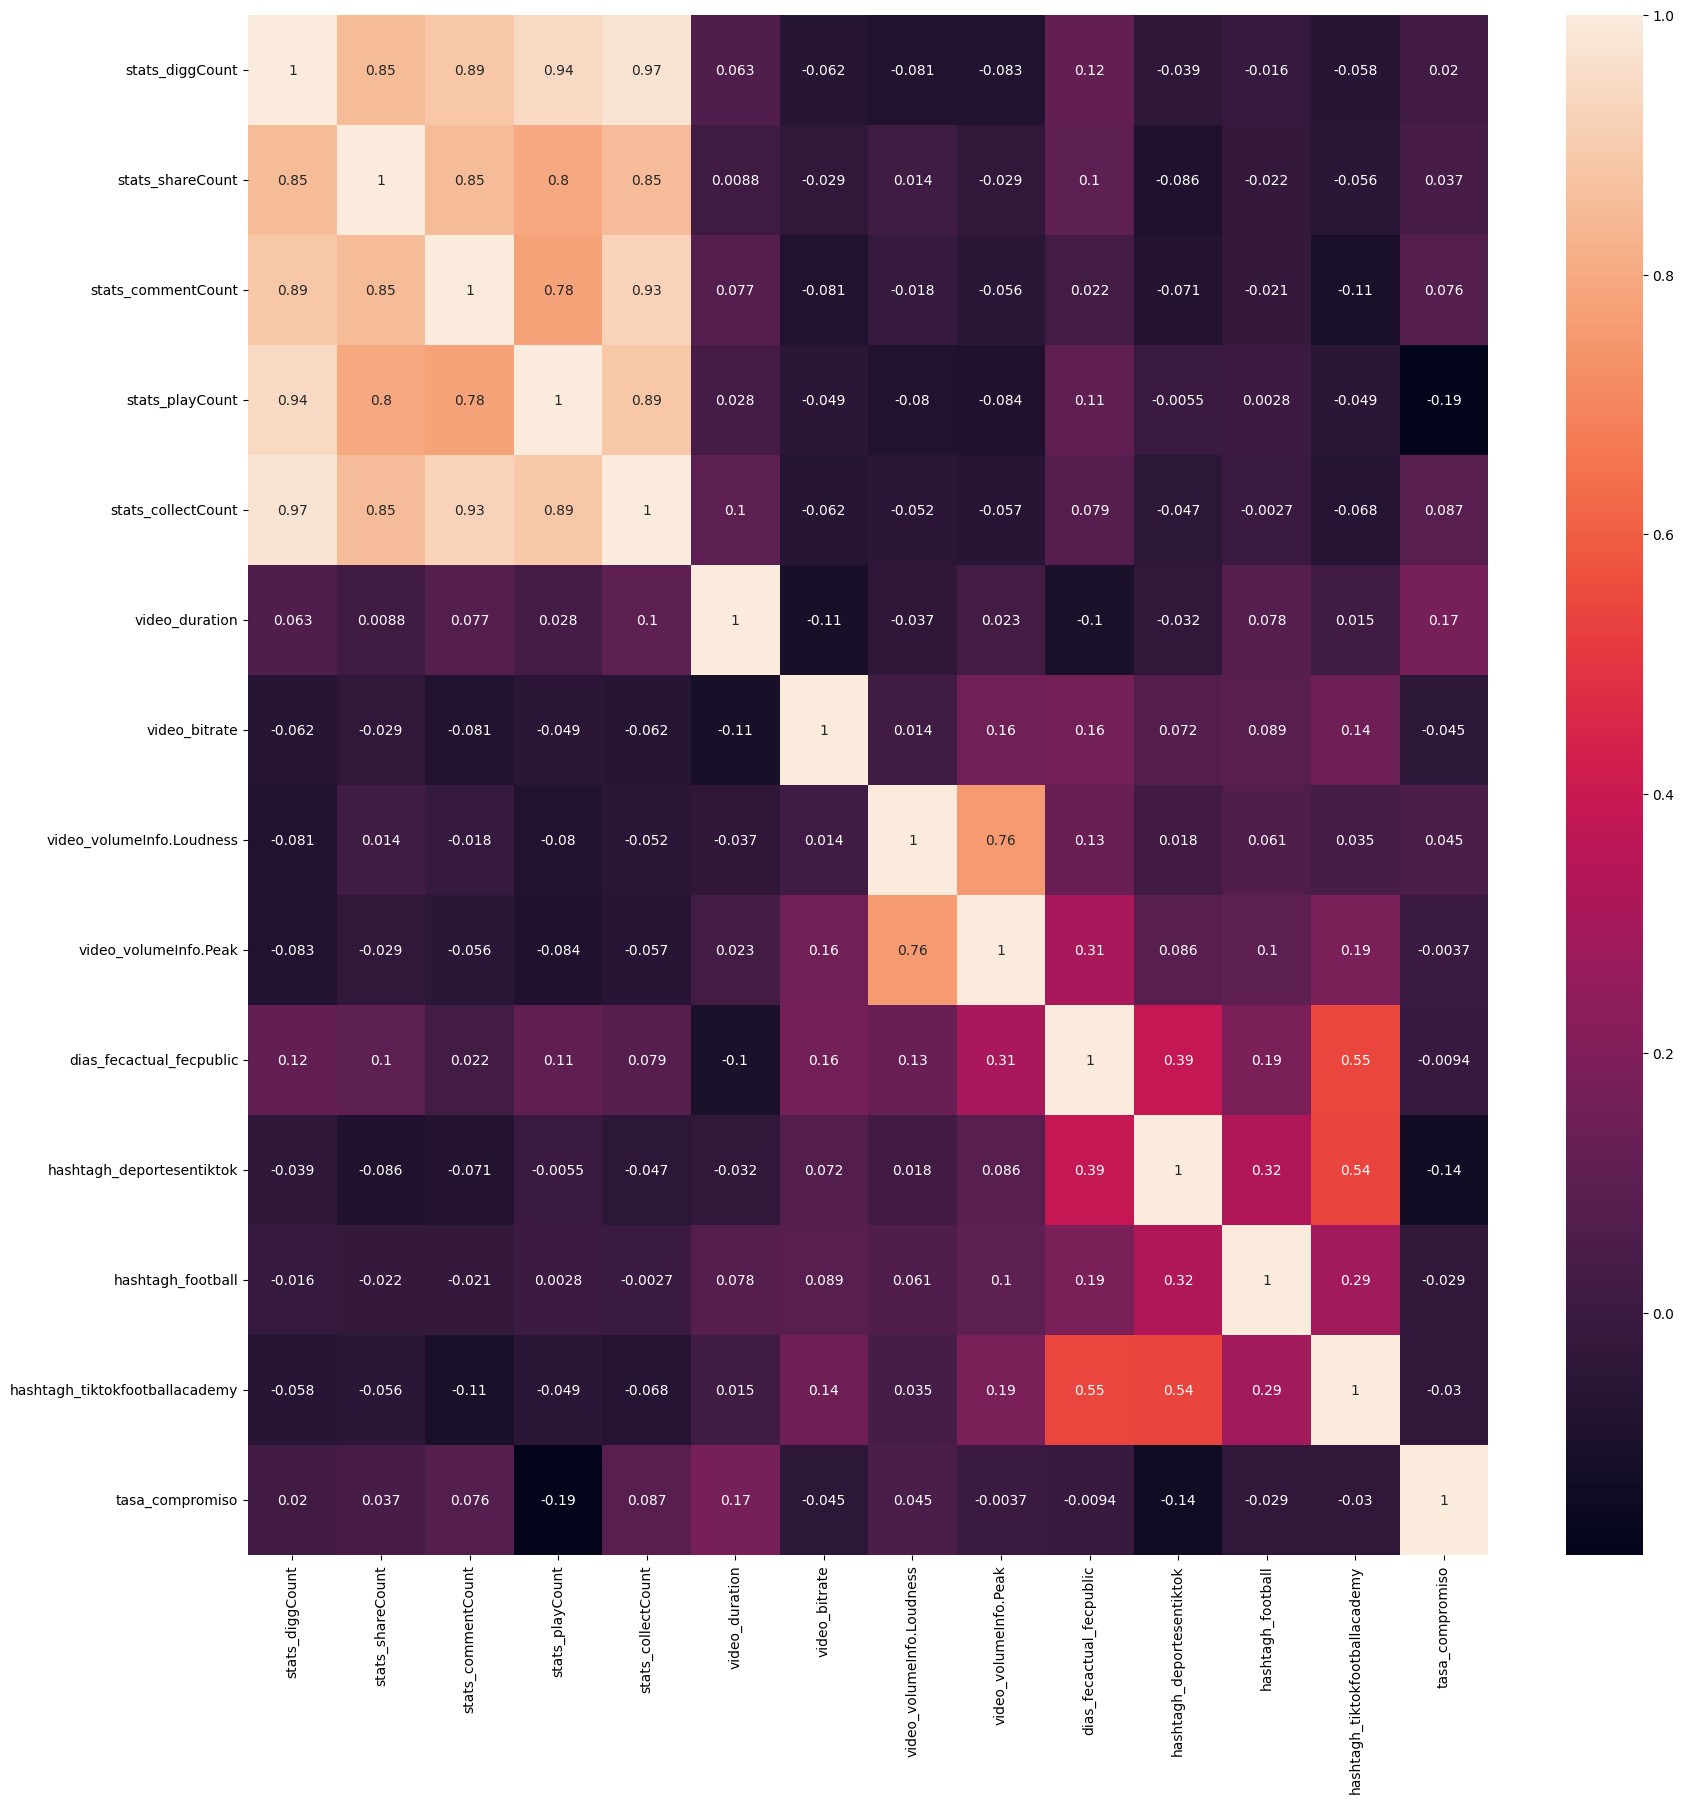

In [ ]:
plt.figure(figsize=(20,20))
df_dummy_corr = df_fcbarcelona_def.iloc[:,2:].corr()
sns.heatmap(df_dummy_corr,annot=True);

En el caso de que se cuenten los datos atípicos:

In [ ]:

def contar_At(df):
    at_count = {}
    for col in df.columns:
        # Cuartil 1
        Q1 = df[col].quantile(q=.25)
        # Cuartil 3
        Q3 = df[col].quantile(q=.75)
        # Rango intercuartil
        IQR = Q3-Q1
        low = Q1-1.5*IQR
        high = Q3+1.5*IQR
        # Conteo de valores atípicos
        at_count[col] = sum((df[col] < low) | (df[col] > high))
        df_at = pd.DataFrame(at_count.items(), columns=['Variable', 'Atipicos'])
    return df_at


contar_At(df_fcbarcelona_num)

,Variable,Atipicos
0,author_followers,2
1,music_preciseDuration.preciseDuration,28
2,stats_diggCount,29
3,stats_shareCount,42
4,stats_commentCount,30
5,stats_playCount,29
6,stats_collectCount,30
7,video_duration,18
8,video_bitrate,1
9,video_volumeInfo.Loudness,4


En el caso de que se quiera sustituir por la mediana de esas variables los datos atípicos para así suavizarlos y que no aleteren la predicción:


In [ ]:
def reemplazar_At(d):
    for col in d.columns:
        # Cuartil 1
        Q1 = d[col].quantile(q=.25)
        # Cuartil 3
        Q3 = d[col].quantile(q=.75)
        # Rango intercuartil
        IQR = Q3-Q1
        low = Q1-1.5*IQR
        high = Q3+1.5*IQR
        # Identificamos los valores atípicos en esta columna
        mask = (d[col] < low) | (d[col] > high)
        while mask.any():
            # Reemplazamos los valores atípicos con la mediana de la columna
            median = d[col].median()
            d.loc[mask, col] = median
            # Recalculamos el rango intercuartil y la máscara de valores atípicos
            Q1 = d[col].quantile(q=.25)
            Q3 = d[col].quantile(q=.75)
            IQR = Q3-Q1
            low = Q1-1.5*IQR
            high = Q3+1.5*IQR

            mask = (d[col] < low) | (d[col] > high)

    return d

df_fcbarcelona_num=reemplazar_At(df_fcbarcelona_num)

In [ ]:
Q1 = df_fcbarcelona_num['stats_playCount'].quantile(q=.25)
Q3 = df_fcbarcelona_num['stats_playCount'].quantile(q=.75)
IQR = Q3-Q1
low = Q1-1.5*IQR
high = Q3+1.5*IQR
high

5908100.0

In [ ]:
df_fcbarcelona_num['stats_playCount']=df_fcbarcelona_num1['stats_playCount']

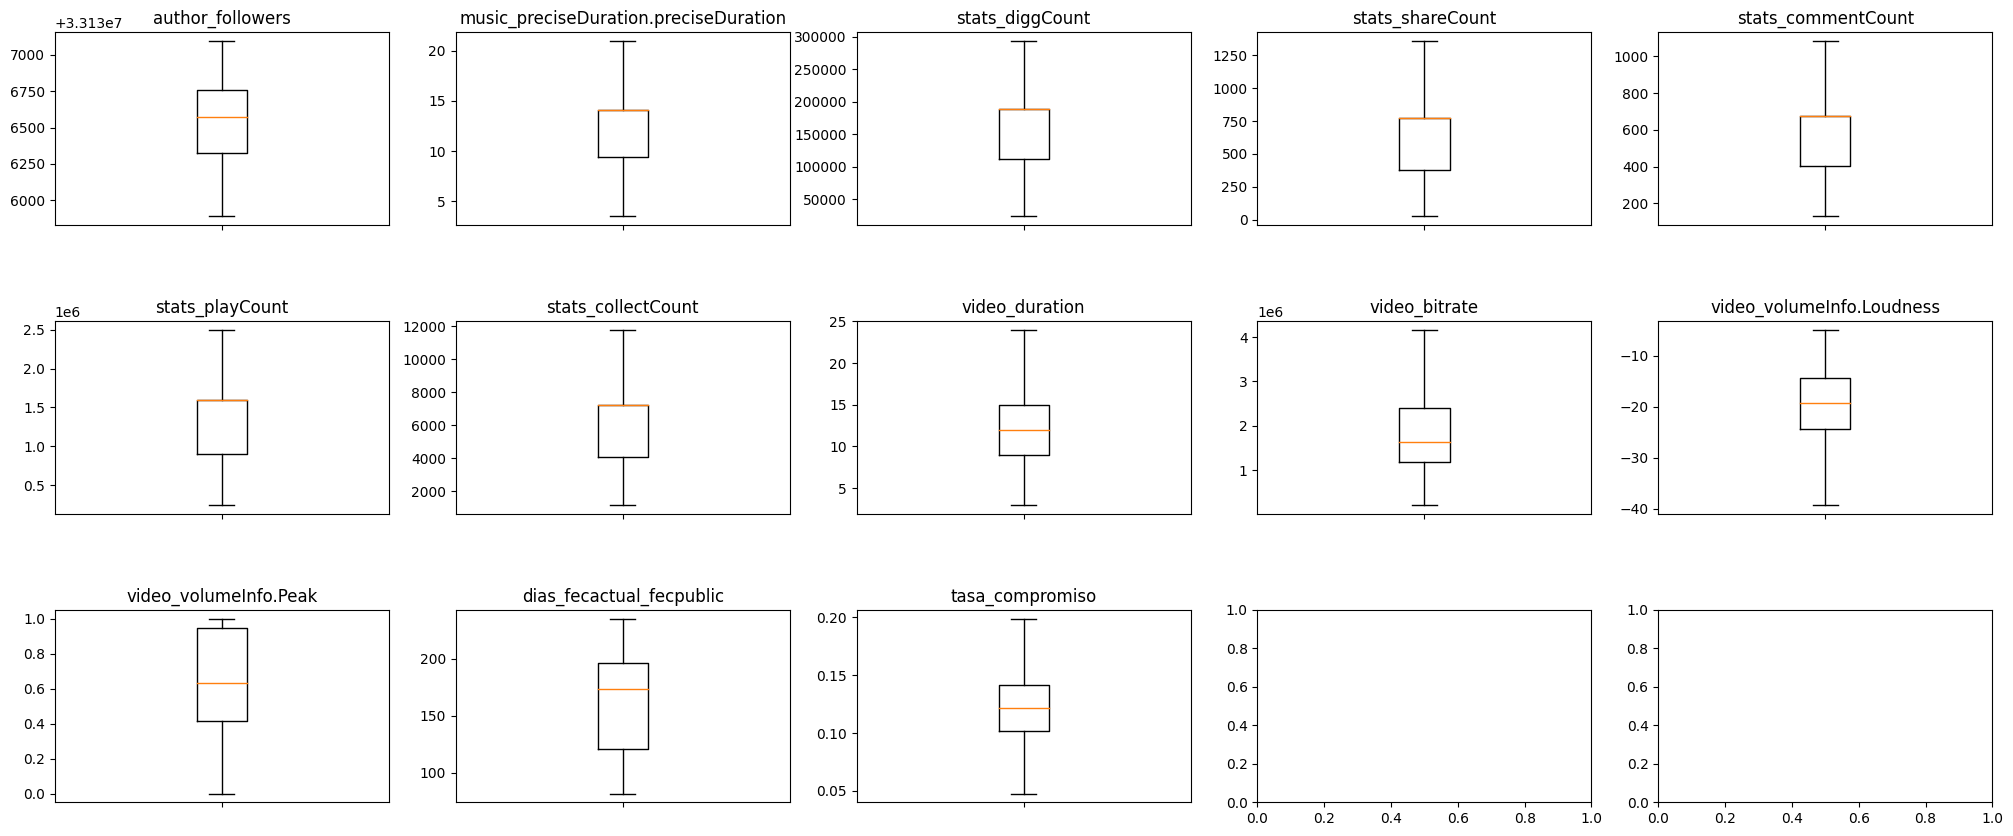

,Variable,Atipicos
0,author_followers,0
1,music_preciseDuration.preciseDuration,0
2,stats_diggCount,0
3,stats_shareCount,0
4,stats_commentCount,0
5,stats_playCount,0
6,stats_collectCount,0
7,video_duration,0
8,video_bitrate,0
9,video_volumeInfo.Loudness,0


In [ ]:
boxP(df_fcbarcelona_num)
contar_At(df_fcbarcelona_num)

In [ ]:
df_fcbarcelona_def=pd.concat([df_fcbarcelona_num, df_fcbarcelona_cat], axis=1)

In [ ]:
df_fcbarcelona_def.to_excel("df_fcbarcelona_def_sindup3.xlsx")

# CUENTA REALMADRID

In [2]:
df_realmadrid_def=pd.read_excel("df_realmadrid_def_sindup1.xlsx")
df_realmadrid_def = df_realmadrid_def.drop('Unnamed: 0', axis=1)
df_realmadrid_def = df_realmadrid_def.iloc[:,1:]
df_realmadrid_def

,author_followers,music_preciseDuration.preciseDuration,stats_diggCount,stats_shareCount,stats_commentCount,stats_playCount,stats_collectCount,video_duration,video_bitrate,video_volumeInfo.Loudness,video_volumeInfo.Peak,dias_fecactual_fecpublic,music_sonido original,hashtagh_realmadrid,tasa_compromiso,music_author_Real Madrid C.F.
0,40386694,59.664000,1400000,6362,3276,12500000,59643,59,1175669,-21.3,0.66834,83,1,True,0.112771,1
1,40385926,19.696000,85000,208,421,969800,3560,19,1610827,-10.9,1.00000,83,1,True,0.088296,1
2,40388444,29.153000,271800,853,609,2100000,12068,29,3267098,-22.4,0.47315,83,1,True,0.130125,1
3,40386907,30.798313,220100,1143,1026,2000000,9215,30,2879856,-17.9,0.53703,83,1,True,0.111134,1
4,40387730,12.094688,347600,854,1254,3200000,12914,12,796655,-28.0,0.30549,85,1,False,0.109284,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,40386980,7.863000,738800,3402,2158,9500000,27184,7,2588668,-14.6,1.00000,233,1,True,0.078354,1
232,40386891,29.648937,888900,9550,5957,8200000,37592,29,2298018,-16.9,1.00000,233,1,True,0.110294,1
233,40386637,15.020375,468100,930,1867,4700000,10846,15,1776703,-19.7,0.75858,234,1,True,0.100191,1
234,40386113,60.839000,178000,604,974,1500000,6836,39,1892913,-12.6,1.00000,234,1,True,0.119719,0


In [3]:
df_realmadrid_def.columns
cols_num=['author_followers', 'music_preciseDuration.preciseDuration',
       'stats_diggCount', 'stats_shareCount', 'stats_commentCount',
       'stats_playCount', 'stats_collectCount', 'video_duration',
       'video_bitrate', 'video_volumeInfo.Loudness', 'video_volumeInfo.Peak',
       'dias_fecactual_fecpublic', 'tasa_compromiso']
cols_cat=['music_sonido original','music_author_Real Madrid C.F.']
df_realmadrid_cat=df_realmadrid_def[cols_cat]

Se visualiza un histograma de las variables de la cuenta realmadrid:

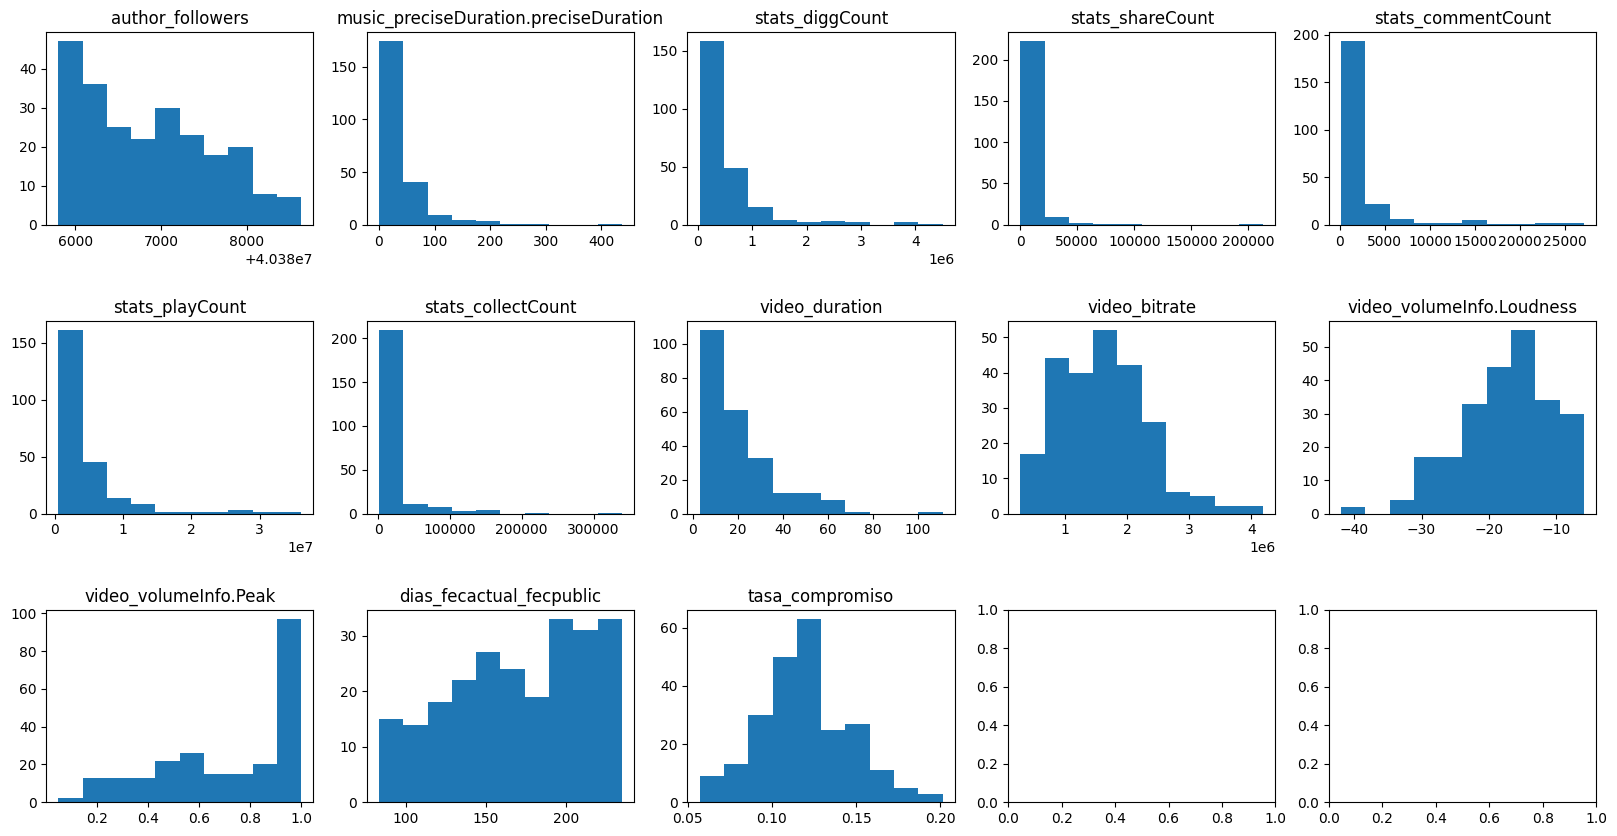

In [4]:
# Vemos un histograma de las variables continuas del dataframe

def Hist(d):
  fig, axs = plt.subplots(3, 5, figsize=(20, 10))
# Creamos un histograma para cada variable
  axs = axs.ravel()
  for i, col in enumerate(d.columns):
      axs[i].hist(d[col], bins=10)
      axs[i].set_title(col)
# Ajustamos los espacios entre los subplots
  plt.subplots_adjust(wspace=0.2, hspace=0.5)
# Mostramos los histogramas
  plt.show()

df_realmadrid_num=df_realmadrid_def[cols_num]

df_realmadrid_num1=df_realmadrid_def[cols_num]

Hist(df_realmadrid_num)

Posteriormente se crea diagrama de bigotes:

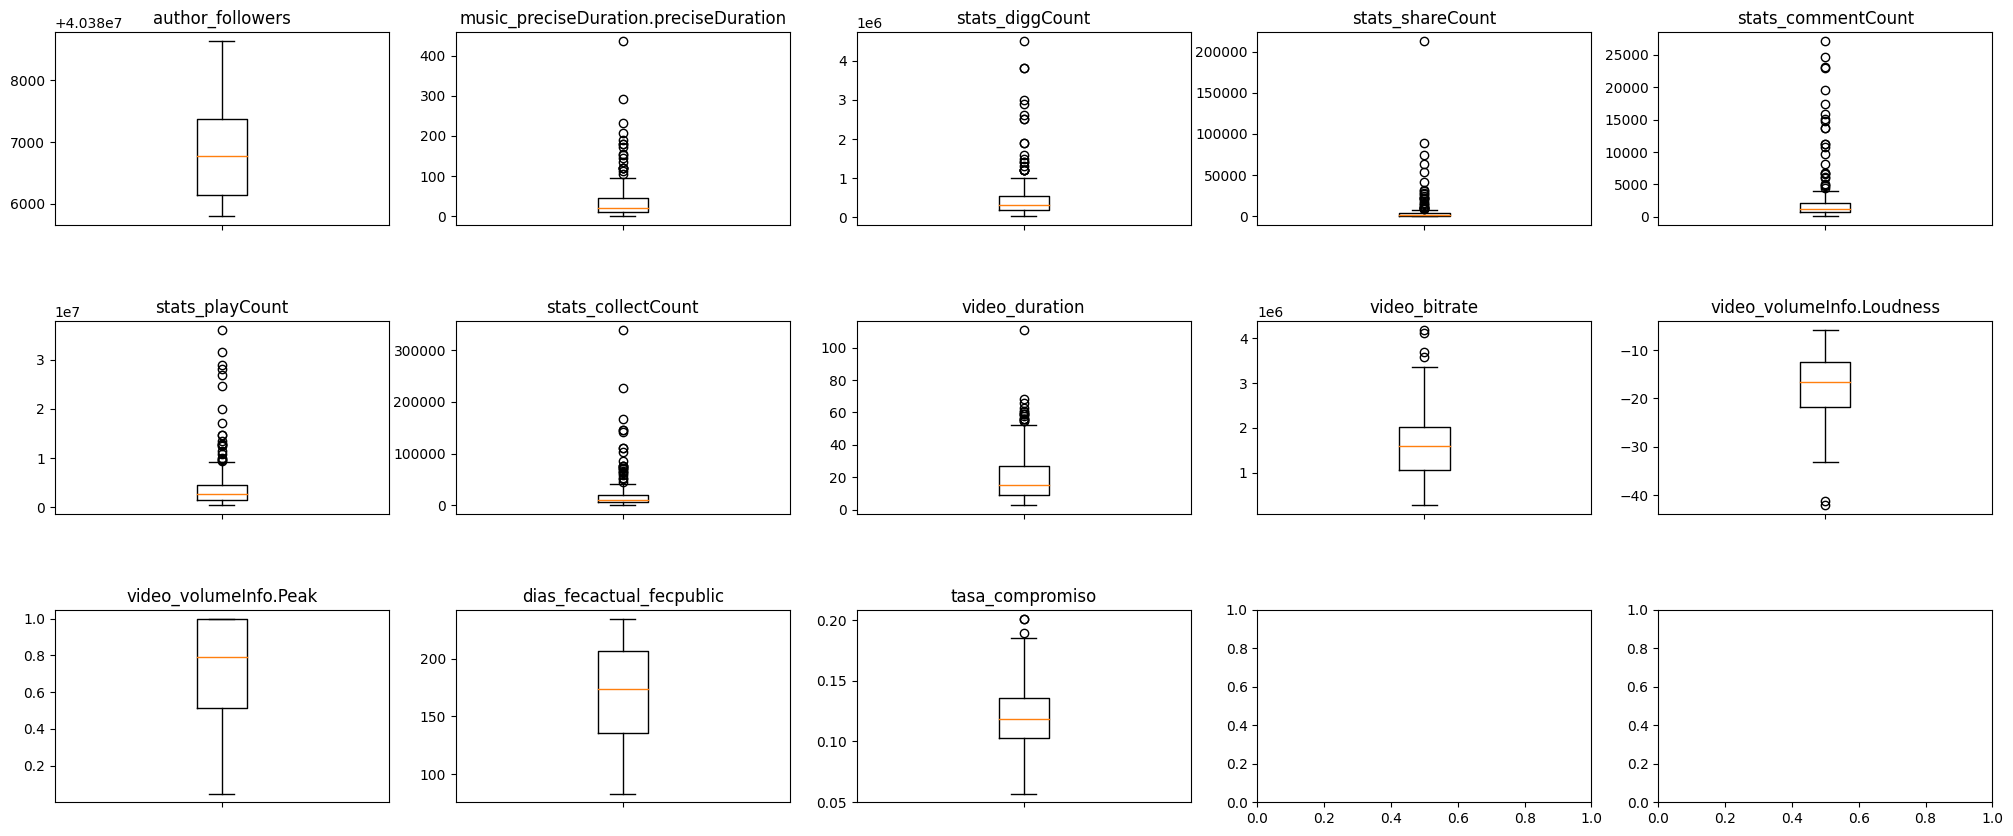

In [5]:

# Creamos unos diagramas de bigotes

def boxP(d):
  fig, axs = plt.subplots(3, 5, figsize=(25, 10))

# Creamos un boxplot para cada variable
  axs = axs.ravel()
  for i, col in enumerate(d.columns):
      axs[i].boxplot(d[col])
      axs[i].set_title(col)
    #quito los 1
      axs[i].set_xticklabels([])
# Ajustamos los espacios entre los subplots
      plt.subplots_adjust(wspace=0.2, hspace=0.5)



# Mostramos los boxplot
  plt.show()


boxP(df_realmadrid_num)

In [6]:

def contar_At(df):
    at_count = {}
    for col in df.columns:
        # Cuartil 1
        Q1 = df[col].quantile(q=.25)
        # Cuartil 3
        Q3 = df[col].quantile(q=.75)
        # Rango intercuartil
        IQR = Q3-Q1
        low = Q1-1.5*IQR
        high = Q3+1.5*IQR
        # Conteo de valores atípicos
        at_count[col] = sum((df[col] < low) | (df[col] > high))
        df_at = pd.DataFrame(at_count.items(), columns=['Variable', 'Atipicos'])
    return df_at


contar_At(df_realmadrid_num)

,Variable,Atipicos
0,author_followers,0
1,music_preciseDuration.preciseDuration,18
2,stats_diggCount,20
3,stats_shareCount,26
4,stats_commentCount,25
5,stats_playCount,21
6,stats_collectCount,23
7,video_duration,15
8,video_bitrate,4
9,video_volumeInfo.Loudness,2


In [ ]:
Q1 = df_realmadrid_num['stats_playCount'].quantile(q=.25)
Q3 = df_realmadrid_num['stats_playCount'].quantile(q=.75)
IQR = Q3-Q1
low = Q1-1.5*IQR
high = Q3+1.5*IQR


In [ ]:
high

9462500.0

Se crea un mapa de calor para visualizar la correlación entre variables:

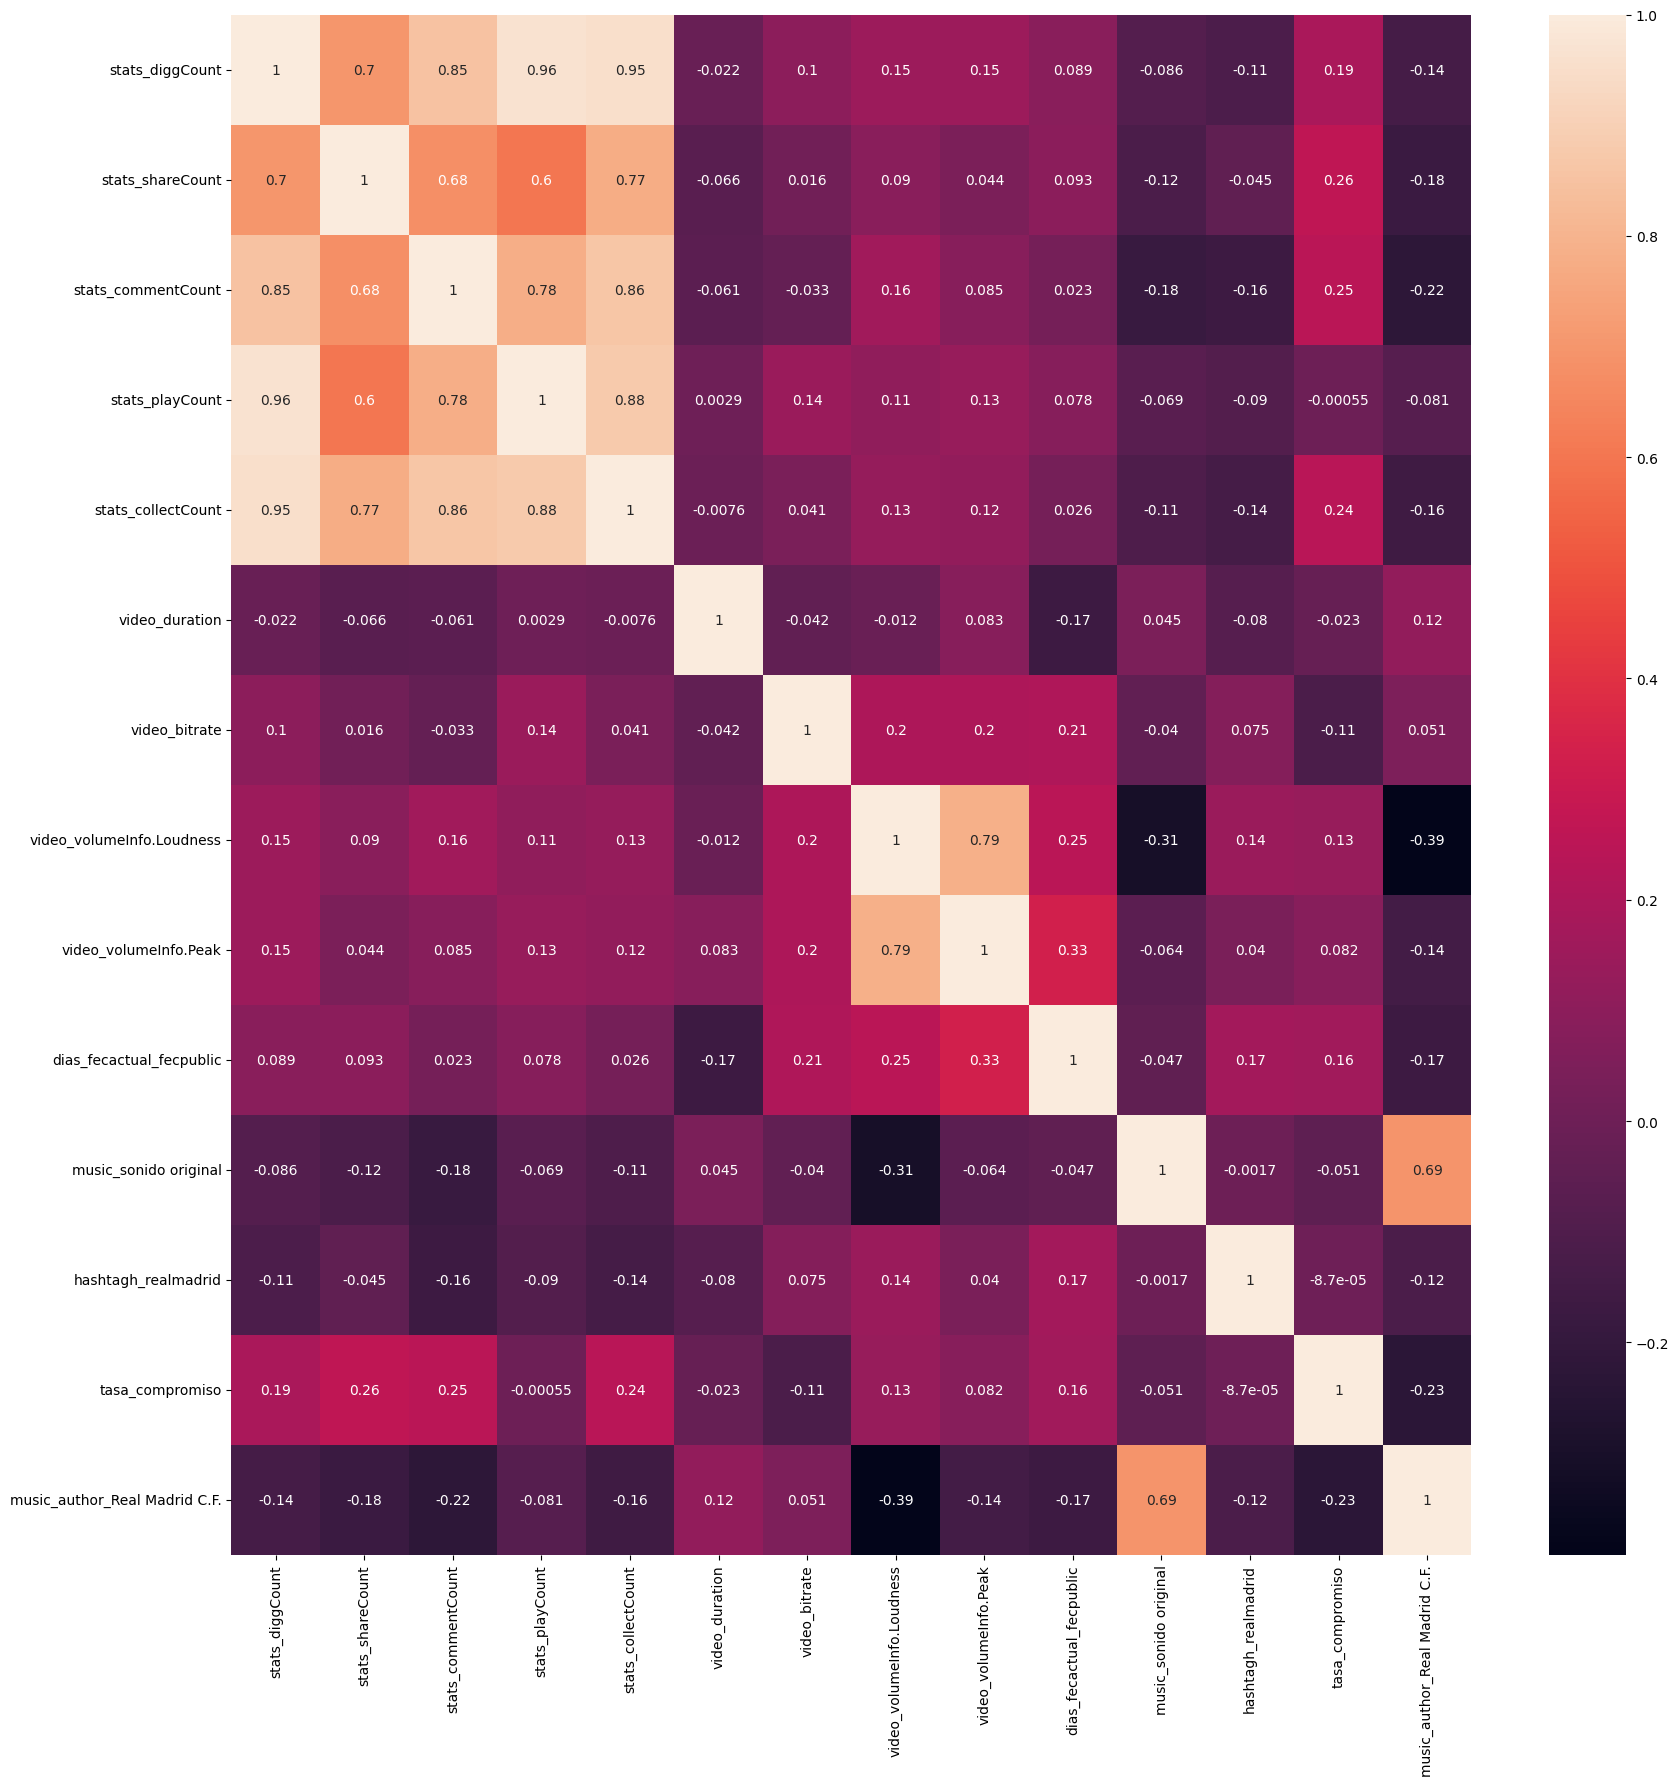

In [7]:
plt.figure(figsize=(20,20))
df_dummy_corr = df_realmadrid_def.iloc[:,2:].corr()
sns.heatmap(df_dummy_corr,annot=True);

En el caso de suavizar los outliers sustituyendolos por la mediana de esas variables de los datos atípicos:

In [8]:
def reemplazar_At(d):
    for col in d.columns:
        # Cuartil 1
        Q1 = d[col].quantile(q=.25)
        # Cuartil 3
        Q3 = d[col].quantile(q=.75)
        # Rango intercuartil
        IQR = Q3-Q1
        low = Q1-1.5*IQR
        high = Q3+1.5*IQR
        # Identificamos los valores atípicos en esta columna
        mask = (d[col] < low) | (d[col] > high)
        while mask.any():
            # Reemplazamos los valores atípicos con la mediana de la columna
            median = d[col].median()
            d.loc[mask, col] = median
            # Recalculamos el rango intercuartil y la máscara de valores atípicos
            Q1 = d[col].quantile(q=.25)
            Q3 = d[col].quantile(q=.75)
            IQR = Q3-Q1
            low = Q1-1.5*IQR
            high = Q3+1.5*IQR

            mask = (d[col] < low) | (d[col] > high)

    return d

df_realmadrid_num=reemplazar_At(df_realmadrid_num)

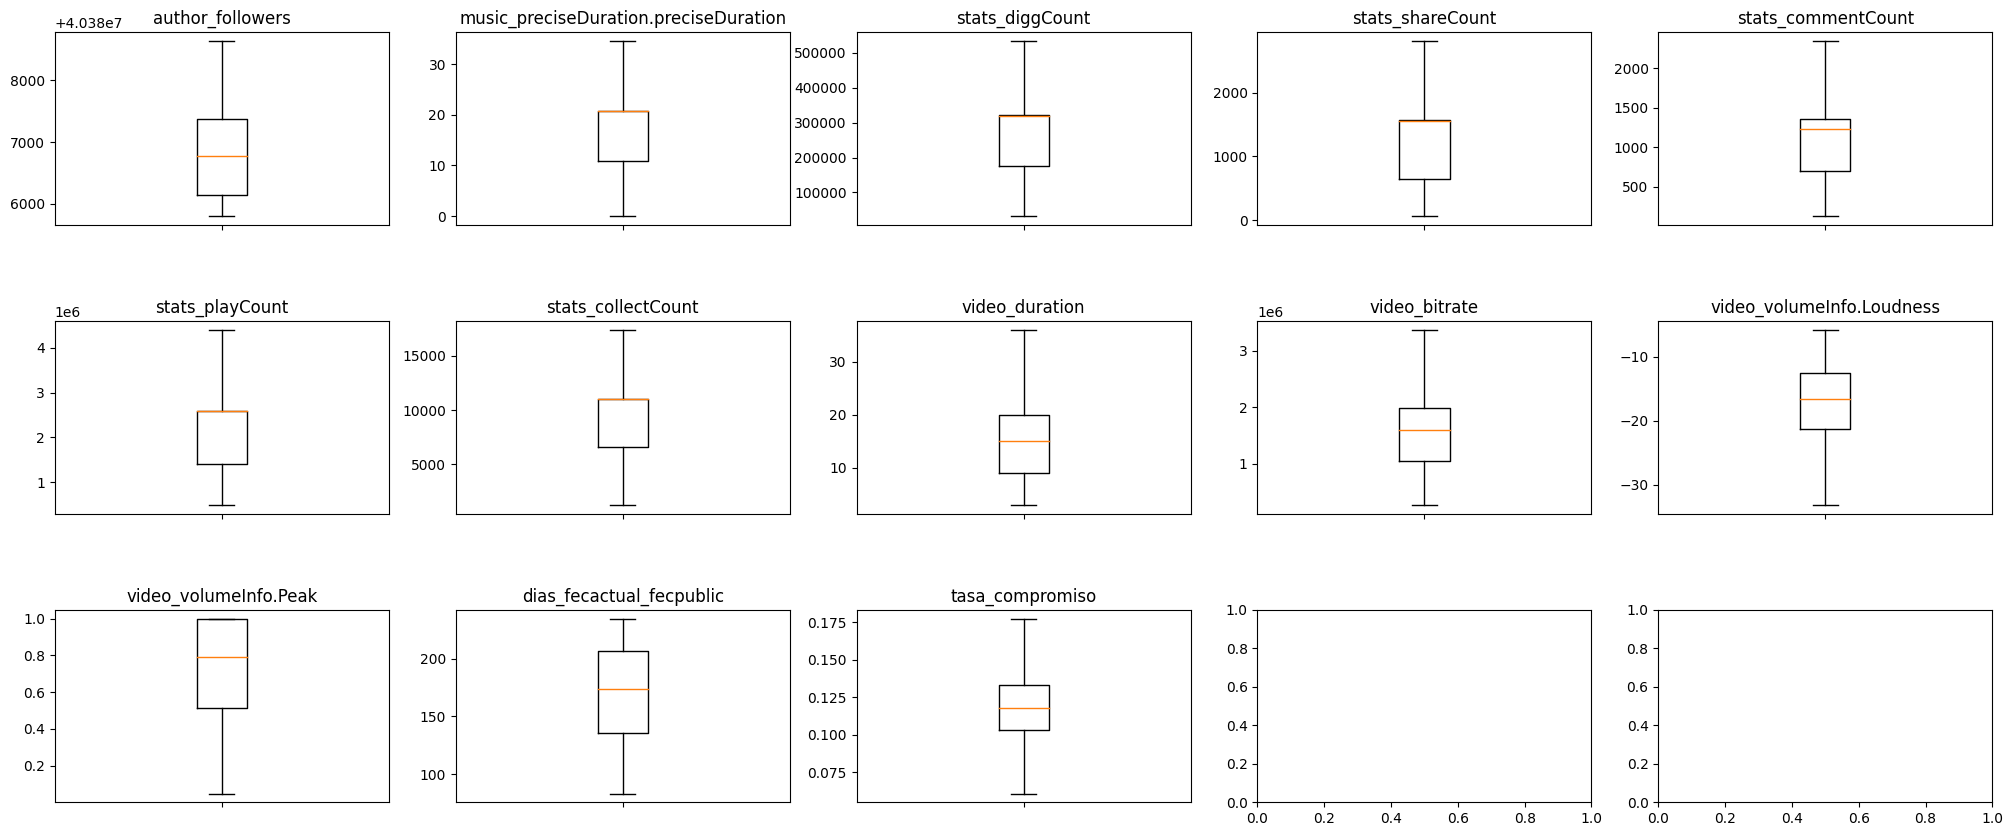

,Variable,Atipicos
0,author_followers,0
1,music_preciseDuration.preciseDuration,0
2,stats_diggCount,0
3,stats_shareCount,0
4,stats_commentCount,0
5,stats_playCount,0
6,stats_collectCount,0
7,video_duration,0
8,video_bitrate,0
9,video_volumeInfo.Loudness,0


In [9]:
boxP(df_realmadrid_num)
contar_At(df_realmadrid_num)

In [10]:
df_realmadrid_def=pd.concat([df_realmadrid_num, df_realmadrid_cat], axis=1)

In [11]:
#df_realmadrid_def.to_excel("df_realmadrid_def_sindup2.xlsx")
df_realmadrid_def.to_excel("df_realmadrid_def_sindup3.xlsx")

# CUENTA MANCITY

In [ ]:
df_mancity_def=pd.read_excel("df_mancity_def_sindup1.xlsx")
df_mancity_def = df_mancity_def.drop('Unnamed: 0', axis=1)
df_mancity_def = df_mancity_def.iloc[:,1:]
df_mancity_def

,author_followers,music_preciseDuration.preciseDuration,stats_diggCount,stats_shareCount,stats_commentCount,stats_playCount,stats_collectCount,video_duration,video_bitrate,video_volumeInfo.Loudness,video_volumeInfo.Peak,dias_fecactual_fecpublic,hashtagh_football,hashtagh_manchestercity,hashtagh_premierleague,tasa_compromiso
0,24127659,39.680000,266700,1440,686,2600000,9378,39,2590965,-12.3,1.00000,82,True,False,False,0.103395
1,24126774,25.783000,37500,101,249,445400,1236,25,1685411,-14.5,0.92257,82,True,False,False,0.084980
2,24126803,13.818750,47000,339,258,418600,2030,7,1768177,-15.8,0.48417,83,True,False,True,0.113705
3,24129066,10.370563,440000,3903,3045,3700000,18524,10,2646531,-13.9,0.52481,83,False,True,False,0.120797
4,24127632,31.033438,170600,795,793,1600000,4977,30,2088717,-29.3,0.11350,83,True,False,True,0.107618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,24127159,11.964063,29200,175,192,265600,1036,11,3006064,-11.2,0.87096,233,True,True,False,0.111322
313,24127415,17.607000,23200,88,128,223000,767,17,1564357,-33.8,0.06998,234,True,True,False,0.105004
314,24128134,15.046500,25400,57,94,232500,821,15,1437657,-17.0,0.54954,234,True,True,False,0.109897
315,24128892,24.686000,32300,210,188,300800,1611,24,733503,-20.5,0.66834,234,False,False,False,0.108703


In [ ]:
df_mancity_def.columns
cols_num=['author_followers', 'music_preciseDuration.preciseDuration',
       'stats_diggCount', 'stats_shareCount', 'stats_commentCount',
       'stats_playCount', 'stats_collectCount', 'video_duration',
       'video_bitrate', 'video_volumeInfo.Loudness', 'video_volumeInfo.Peak',
       'dias_fecactual_fecpublic', 'tasa_compromiso']
cols_cat=['hashtagh_football', 'hashtagh_manchestercity', 'hashtagh_premierleague']
df_mancity_cat=df_mancity_def[cols_cat]

Se visualizan las variables numéricas en un histograma:

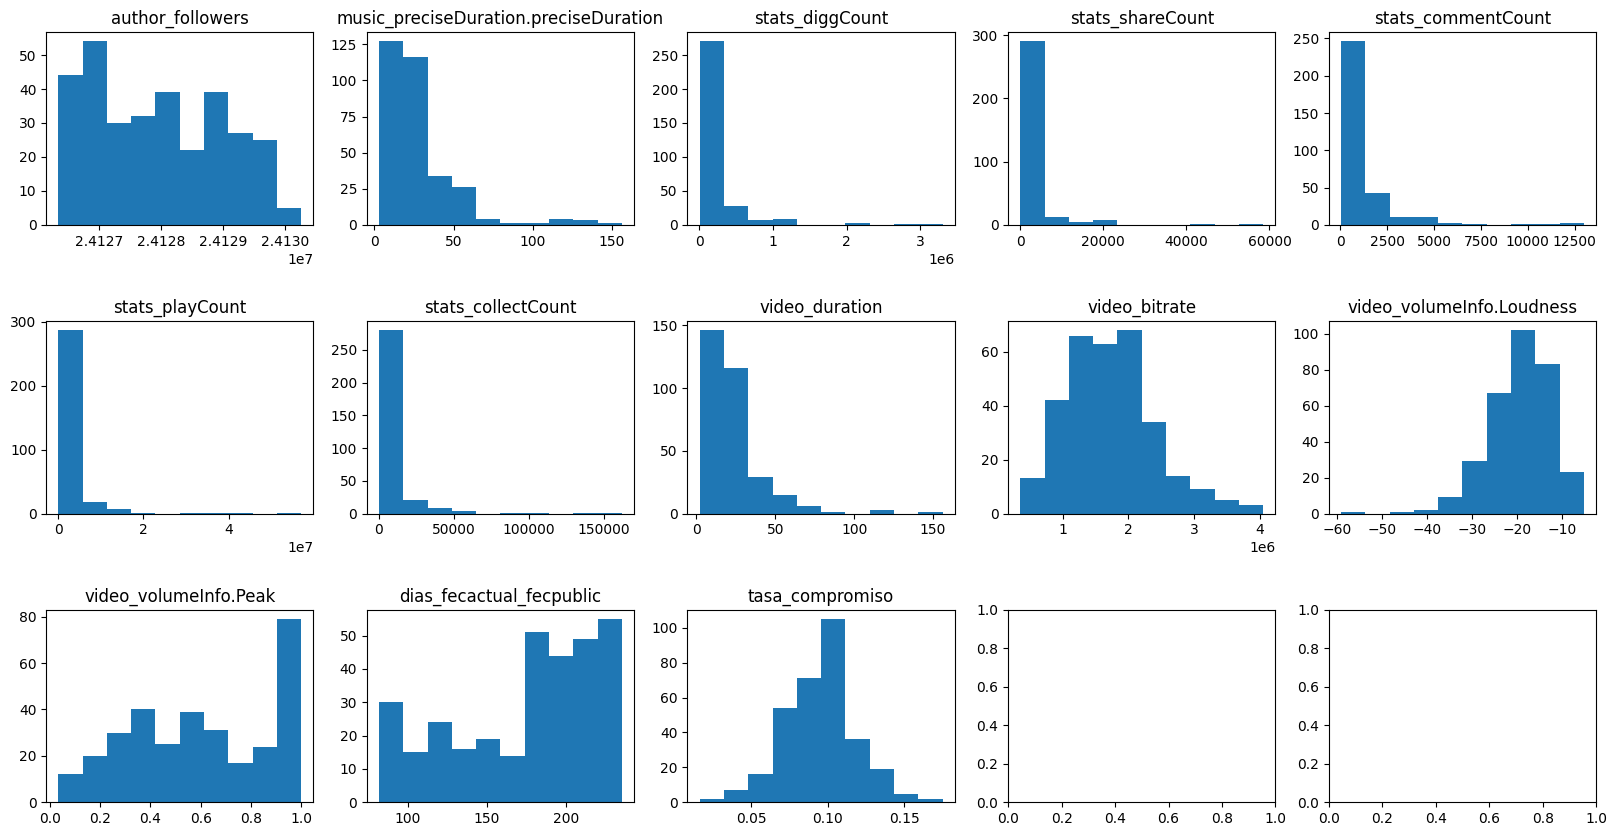

In [ ]:
# Vemos un histograma de las variables continuas del dataframe

def Hist(d):
  fig, axs = plt.subplots(3, 5, figsize=(20, 10))
# Creamos un histograma para cada variable
  axs = axs.ravel()
  for i, col in enumerate(d.columns):
      axs[i].hist(d[col], bins=10)
      axs[i].set_title(col)
# Ajustamos los espacios entre los subplots
  plt.subplots_adjust(wspace=0.2, hspace=0.5)
# Mostramos los histogramas
  plt.show()

df_mancity_num=df_mancity_def[cols_num]

Hist(df_mancity_num)

Se visualizan las variables en un diagrama de bigotes:

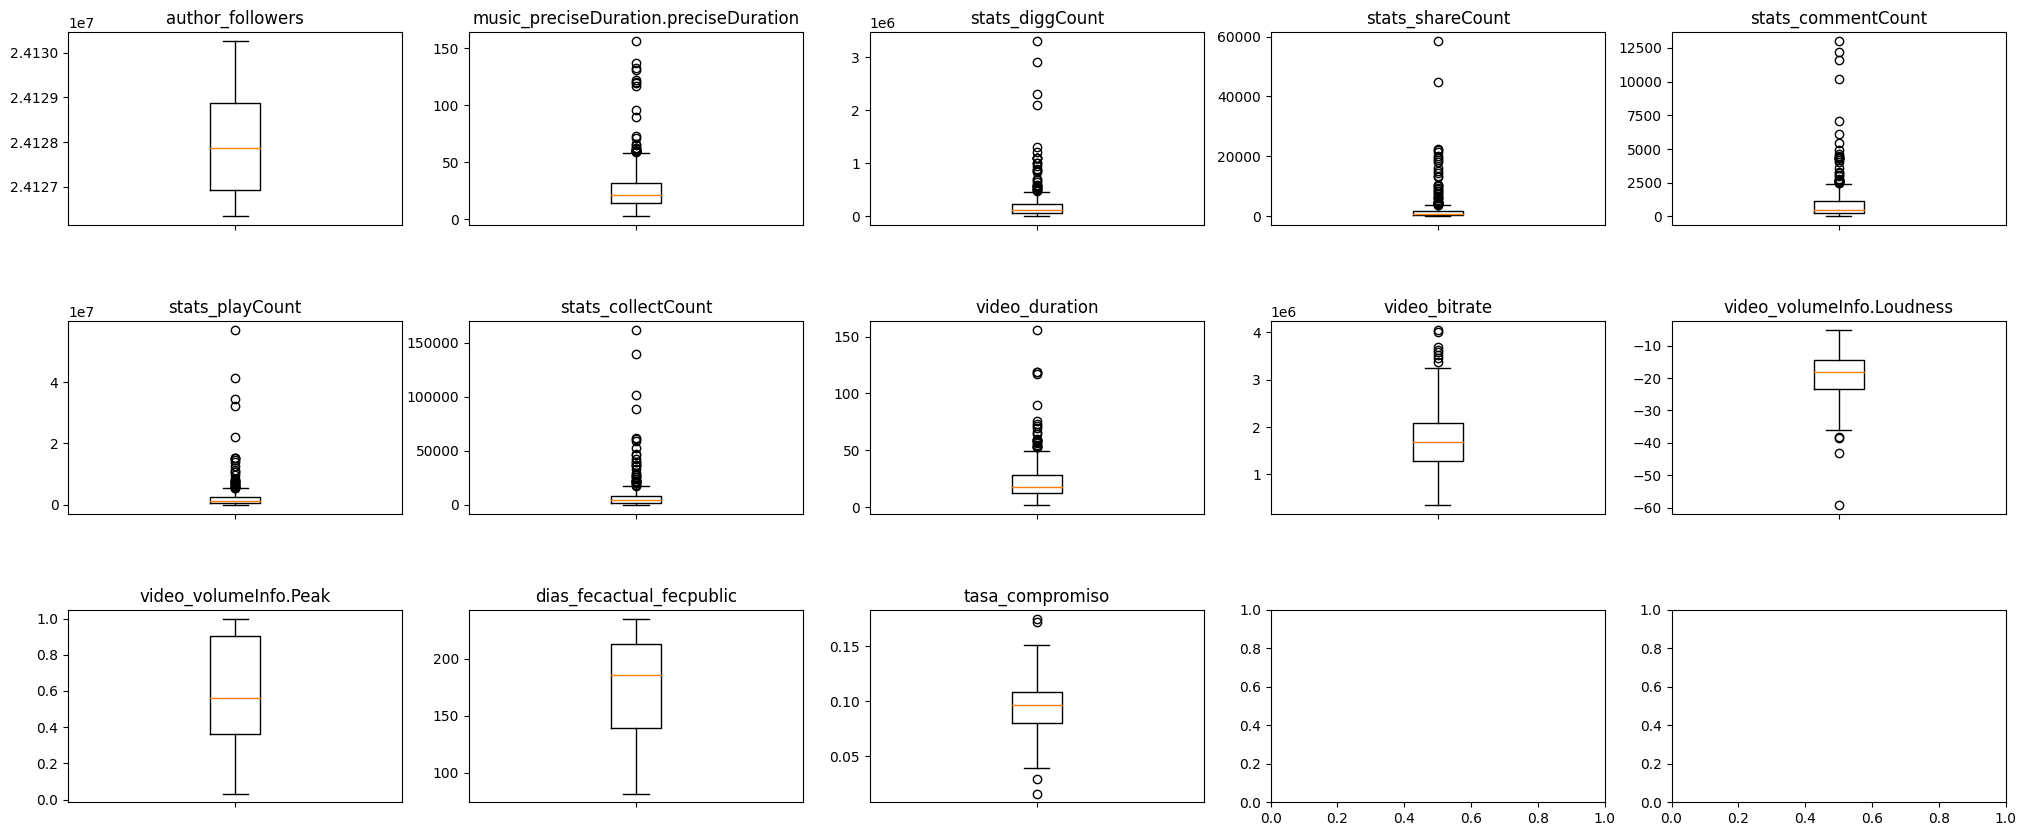

In [ ]:
# Creamos unos diagramas de bigotes

def boxP(d):
  fig, axs = plt.subplots(3, 5, figsize=(25, 10))

# Creamos un boxplot para cada variable
  axs = axs.ravel()
  for i, col in enumerate(d.columns):
      axs[i].boxplot(d[col])
      axs[i].set_title(col)
    #quito los 1
      axs[i].set_xticklabels([])
# Ajustamos los espacios entre los subplots
      plt.subplots_adjust(wspace=0.2, hspace=0.5)



# Mostramos los boxplot
  plt.show()


boxP(df_mancity_num)

In [ ]:

def contar_At(df):
    at_count = {}
    for col in df.columns:
        # Cuartil 1
        Q1 = df[col].quantile(q=.25)
        # Cuartil 3
        Q3 = df[col].quantile(q=.75)
        # Rango intercuartil
        IQR = Q3-Q1
        low = Q1-1.5*IQR
        high = Q3+1.5*IQR
        # Conteo de valores atípicos
        at_count[col] = sum((df[col] < low) | (df[col] > high))
        df_at = pd.DataFrame(at_count.items(), columns=['Variable', 'Atipicos'])
    return df_at


contar_At(df_mancity_num)

,Variable,Atipicos
0,author_followers,0
1,music_preciseDuration.preciseDuration,29
2,stats_diggCount,31
3,stats_shareCount,40
4,stats_commentCount,32
5,stats_playCount,33
6,stats_collectCount,33
7,video_duration,23
8,video_bitrate,8
9,video_volumeInfo.Loudness,4


In [ ]:
Q1 = df_mancity_num['stats_playCount'].quantile(q=.25)
Q3 = df_mancity_num['stats_playCount'].quantile(q=.75)
IQR = Q3-Q1
low = Q1-1.5*IQR
high = Q3+1.5*IQR


In [ ]:
high

5461250.0

Se visualizan las correlaciones entre variables:

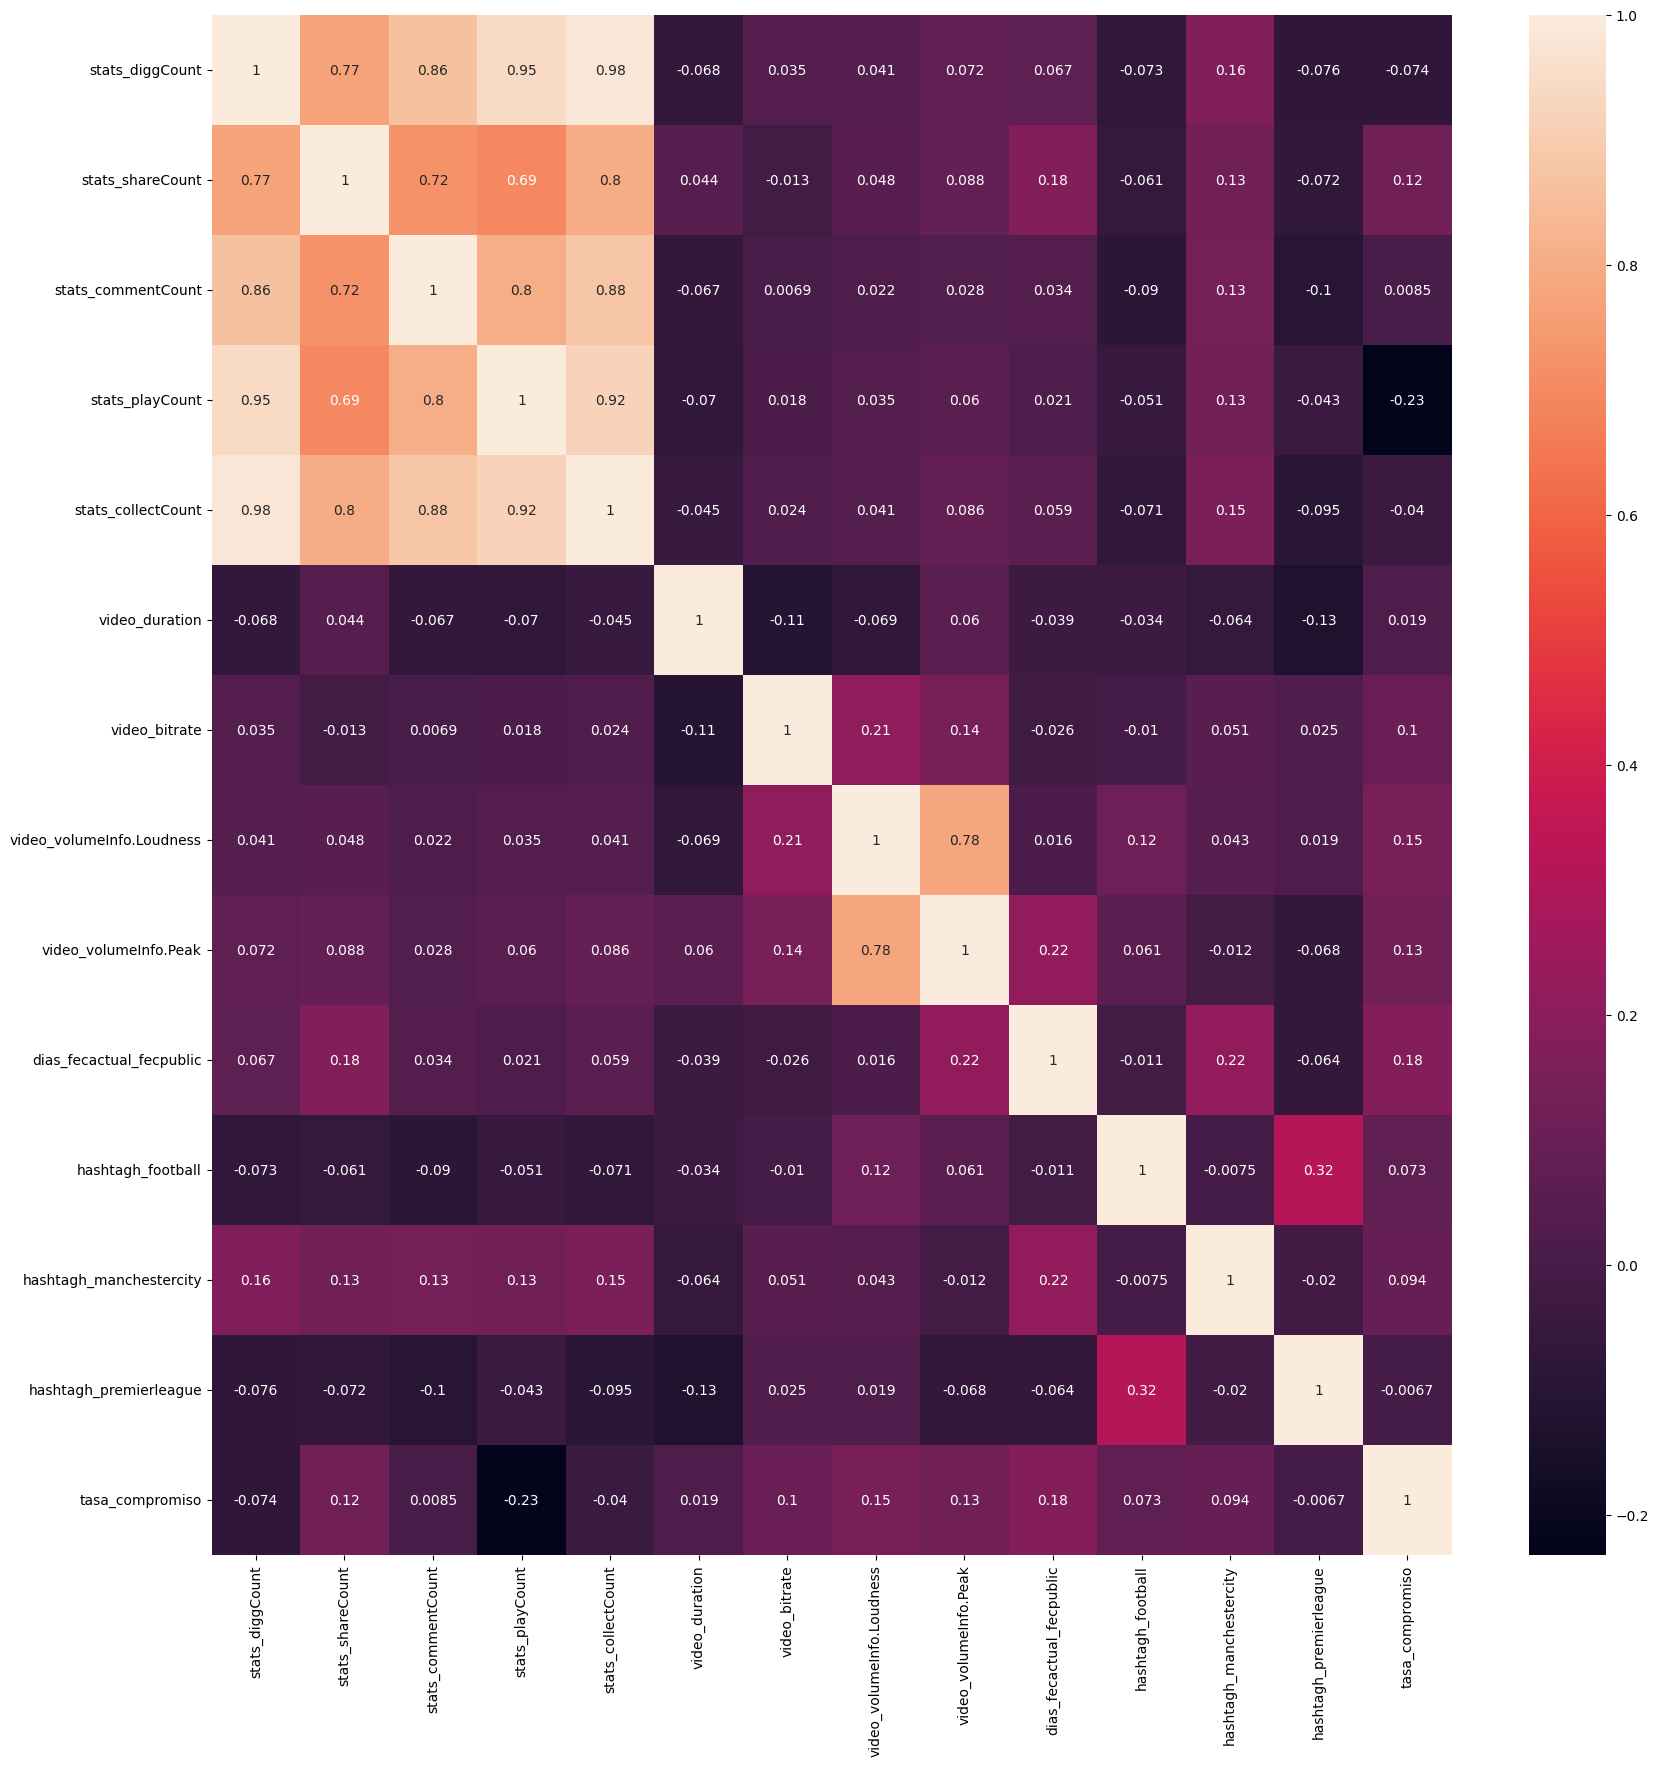

In [ ]:
plt.figure(figsize=(20,20))
df_dummy_corr = df_mancity_def.iloc[:,2:].corr()
sns.heatmap(df_dummy_corr,annot=True);

Si se realiza un suavizado de outliers mediante la sustitución de la mediana de estos:

In [ ]:
def reemplazar_At(d):
    for col in d.columns:
        # Cuartil 1
        Q1 = d[col].quantile(q=.25)
        # Cuartil 3
        Q3 = d[col].quantile(q=.75)
        # Rango intercuartil
        IQR = Q3-Q1
        low = Q1-1.5*IQR
        high = Q3+1.5*IQR
        # Identificamos los valores atípicos en esta columna
        mask = (d[col] < low) | (d[col] > high)
        while mask.any():
            # Reemplazamos los valores atípicos con la mediana de la columna
            median = d[col].median()
            d.loc[mask, col] = median
            # Recalculamos el rango intercuartil y la máscara de valores atípicos
            Q1 = d[col].quantile(q=.25)
            Q3 = d[col].quantile(q=.75)
            IQR = Q3-Q1
            low = Q1-1.5*IQR
            high = Q3+1.5*IQR

            mask = (d[col] < low) | (d[col] > high)

    return d

df_mancity_num=reemplazar_At(df_mancity_num)

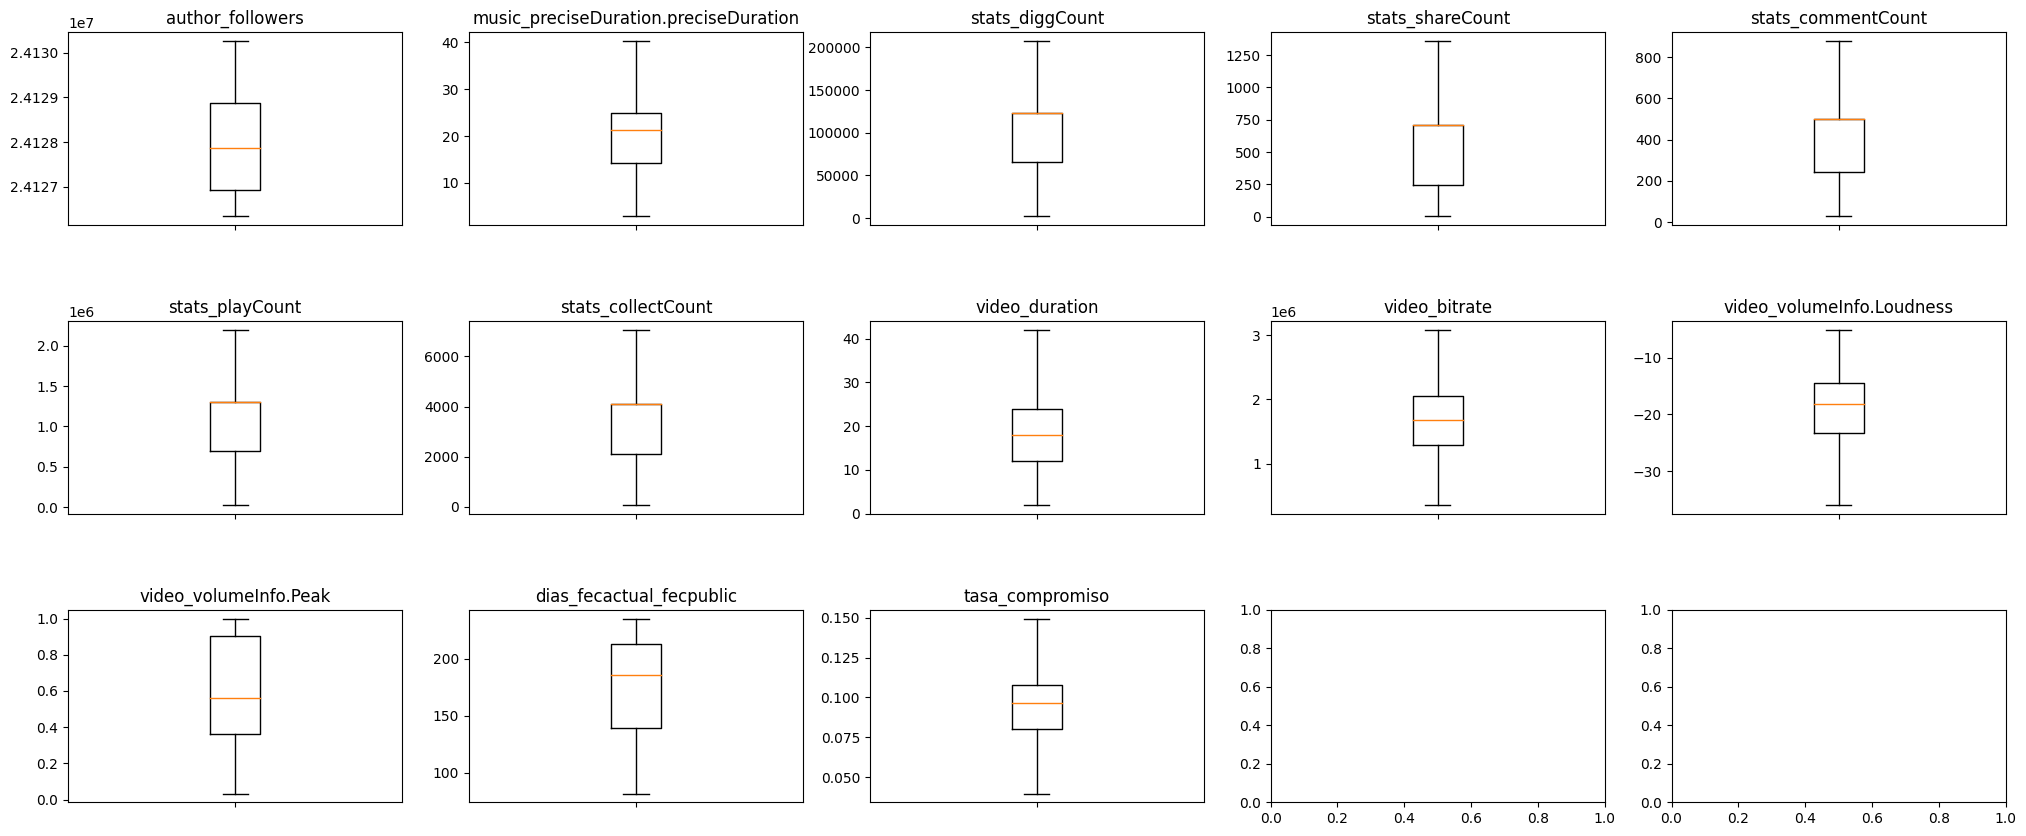

,Variable,Atipicos
0,author_followers,0
1,music_preciseDuration.preciseDuration,0
2,stats_diggCount,0
3,stats_shareCount,0
4,stats_commentCount,0
5,stats_playCount,0
6,stats_collectCount,0
7,video_duration,0
8,video_bitrate,0
9,video_volumeInfo.Loudness,0


In [ ]:
boxP(df_mancity_num)
contar_At(df_mancity_num)

In [ ]:
df_mancity_def=pd.concat([df_mancity_num, df_mancity_cat], axis=1)

In [ ]:
df_mancity_def.to_excel("df_mancity_def_sindup2.xlsx")